In [2]:
!pip install keras

In [5]:
import keras
print(keras.__version__)

3.3.3


In [6]:
!pip install --upgrade keras

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [20]:
filenames = os.listdir("Drives")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'ok':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

,filename,category
0,nok.(44).png,0
1,nok.(189).png,0
2,nok.(473).png,0
3,nok.(166).png,0
4,ok.(384).png,1


In [21]:
len(df)

1000

In [23]:
df.dtypes

filename    object
category     int64
dtype: object

<AxesSubplot: xlabel='category'>

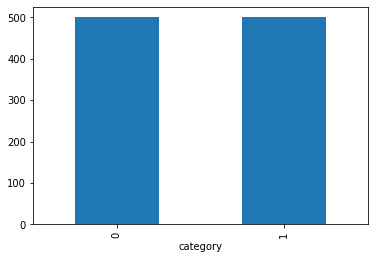

In [24]:
df['category'].value_counts().plot.bar()

In [25]:
df['category'] = df['category'].apply(str)

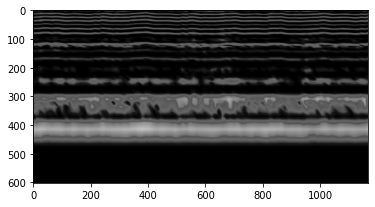

In [26]:
sample = random.choice(filenames)
image = load_img("Drives/"+sample)
plt.imshow(image)

In [36]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

In [38]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [39]:
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [41]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 7,342,593 (28.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [42]:
train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

#validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
#train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [43]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "Drives/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 900 validated image filenames belonging to 2 classes.


In [44]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "Drives/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 100 validated image filenames belonging to 2 classes.


Found 1 validated image filenames belonging to 1 classes.


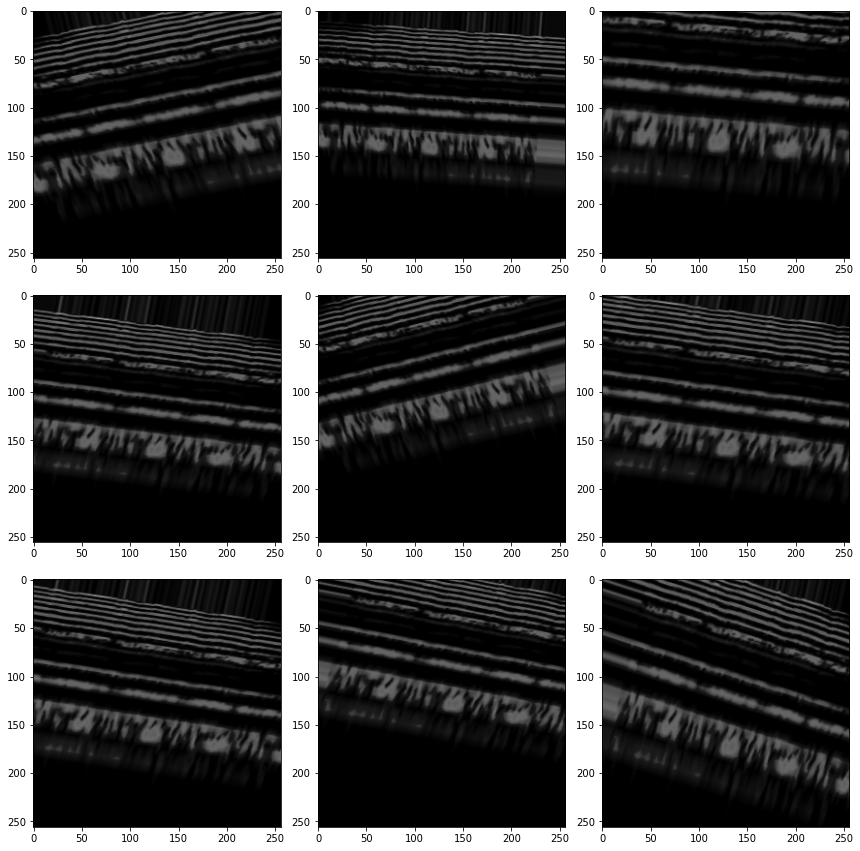

In [45]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "Drives/", 
    x_col='filename',
    y_col='category',
#    class_mode='binary'
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [47]:
# fine-tune the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 376s 7s/step - accuracy: 0.4967 - loss: 0.7990 - val_accuracy: 0.5417 - val_loss: 0.6858
Epoch 2/5
 1/56 ━━━━━━━━━━━━━━━━━━━━ 5:10 6s/step - accuracy: 0.7500 - loss: 0.6266

2024-05-10 15:36:47.168102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7500 - loss: 0.6266 - val_accuracy: 1.0000 - val_loss: 0.6194
Epoch 3/5


2024-05-10 15:36:48.498206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 362s 6s/step - accuracy: 0.4924 - loss: 0.7288 - val_accuracy: 0.5938 - val_loss: 0.6692
Epoch 4/5
 1/56 ━━━━━━━━━━━━━━━━━━━━ 5:20 6s/step - accuracy: 0.4375 - loss: 0.9008

2024-05-10 15:42:56.657166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4375 - loss: 0.9008 - val_accuracy: 0.5000 - val_loss: 0.6783
Epoch 5/5


2024-05-10 15:42:57.892943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


56/56 ━━━━━━━━━━━━━━━━━━━━ 374s 7s/step - accuracy: 0.5072 - loss: 0.7167 - val_accuracy: 0.5729 - val_loss: 0.6645


In [51]:
loss, accuracy = model.evaluate(validation_generator, steps = total_validate//batch_size)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.4708 - loss: 0.6990
Test: accuracy = 0.572917  ;  loss = 0.664602 


ZeroDivisionError: division by zero

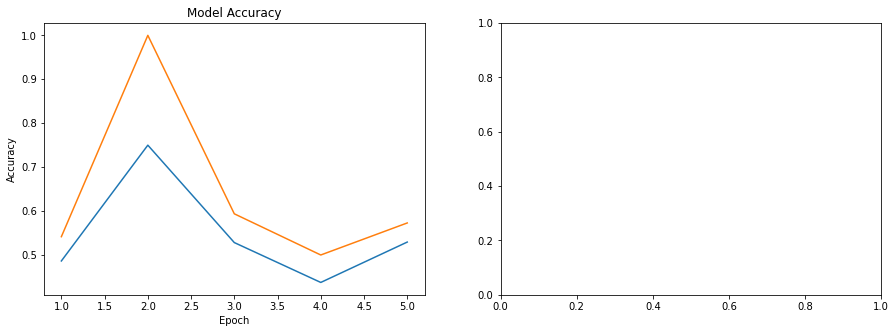

In [53]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1, len(model_history.history[acc])//10))
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)

In [55]:
Y_val = validate_df['category']
y_pred =  model.predict(validation_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step


In [56]:
Y_val

0     1
1     1
2     1
3     0
4     0
     ..
95    0
96    1
97    1
98    1
99    0
Name: category, Length: 100, dtype: object

In [57]:
Data_Y_val = pd.DataFrame(Y_val)

In [58]:
Data_Y_val['category'] = Data_Y_val['category'].astype(str)

In [59]:
Data_Y_val.dtypes

category    object
dtype: object

In [60]:
Data_Y_val.to_numpy()

array([['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['0'],
      

In [61]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

In [62]:
y_final.size

100

In [63]:
data_y_final = pd.DataFrame(y_final)

In [64]:
data_y_final.columns = ['category']

In [65]:
data_y_final['category'] = data_y_final['category'].astype(str)

In [66]:
data_y_final.dtypes

category    object
dtype: object

In [67]:
data_y_final.to_numpy()

array([['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
      

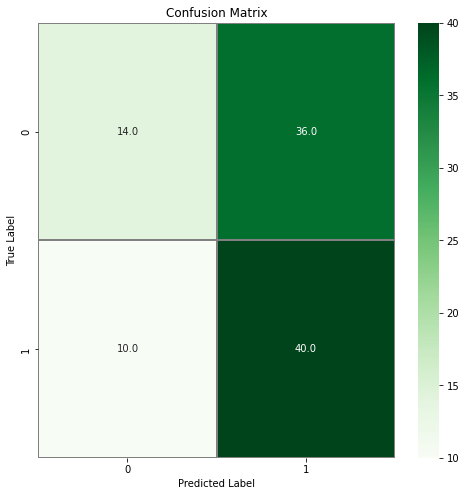

In [68]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(Data_Y_val, data_y_final) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [69]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Data_Y_val, data_y_final, target_names=['0','1'])

print(report)

              precision    recall  f1-score   support

           0       0.58      0.28      0.38        50
           1       0.53      0.80      0.63        50

    accuracy                           0.54       100
   macro avg       0.55      0.54      0.51       100
weighted avg       0.55      0.54      0.51       100



In [70]:
test_filenames = os.listdir("Drives")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [71]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "Drives_Test2", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 0 validated image filenames.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1000 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [73]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

ValueError: Must provide at least one structure

In [74]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("Drives"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

KeyError: 'category'

<Figure size 864x864 with 0 Axes>